# **Tourism Recommendation Model:** Data Preprocessing
Aurellia Gita Elysia | 2602569722

Dataset: 
https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination/data

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 2. Load Datasets

In [2]:
user_df = pd.read_csv('dataset/user.csv')
tourism_df = pd.read_csv('dataset/tourism_with_id.csv')
rating_df = pd.read_csv('dataset/tourism_rating.csv')
package_df = pd.read_csv('dataset/package_tourism.csv')

# 3. Data Understanding

## 3.1. user_df

In [3]:
user_df.info()
user_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


In [4]:
user_df.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


## 3.2. tourism_df

In [5]:
tourism_df.info()
tourism_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.0,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,NaN,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,NaN,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,NaN,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,NaN,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,NaN,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,NaN,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,NaN,437.000000


In [6]:
tourism_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


## 3.3. package_df

In [7]:
package_df.info()
package_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN


## 3.4 rating_df

In [8]:
rating_df.info()
rating_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [9]:
rating_df.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [10]:
print(f"Number of places in the datasets : {len(tourism_df.Place_Id.unique())}")
print(f"Number of users : {len(user_df.User_Id.unique())}")
print(f"Number of tourism category : {len(tourism_df.Category.unique())}")
print(tourism_df.Category.unique())
print(f"The number of ratings given by the user to the dataset : {len(rating_df.User_Id)}")

Number of places in the datasets : 437
Number of users : 300
Number of tourism category : 6
['Budaya' 'Taman Hiburan' 'Cagar Alam' 'Bahari' 'Pusat Perbelanjaan'
 'Tempat Ibadah']
The number of ratings given by the user to the dataset : 10000


# 4. Data Preproessing

## 4.1. Duplicate Data

In [11]:
# Check for duplicates in each dataset
print('Duplicates in user data:', user_df.duplicated().sum())
print('Duplicates in tourism data:', tourism_df.duplicated().sum())
print('Duplicates in rating data:', rating_df.duplicated().sum())
print('Duplicates in package data:', package_df.duplicated().sum())

Duplicates in user data: 0
Duplicates in tourism data: 0
Duplicates in rating data: 79
Duplicates in package data: 0


In [12]:
# Remove duplicates
rating_df.drop_duplicates(inplace=True)

**❗ Notes:**<br>
> After running this code, recheck the duplicates in the rating_df dataset by re-running the previous code cell.

## 4.2. Missing Value

In [13]:
# Check for missing values
print('Missing values in user data:\n', user_df.isnull().sum(), '\n')
print('Missing values in tourism data:\n', tourism_df.isnull().sum(), '\n')
print('Missing values in rating data:\n', rating_df.isnull().sum(), '\n')
print('Missing values in package data:\n', package_df.isnull().sum(), '\n')

Missing values in user data:
 User_Id     0
Location    0
Age         0
dtype: int64 

Missing values in tourism data:
 Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64 

Missing values in rating data:
 User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64 

Missing values in package data:
 Package            0
City               0
Place_Tourism1     0
Place_Tourism2     0
Place_Tourism3     0
Place_Tourism4    34
Place_Tourism5    61
dtype: int64 



**💡 Explanation:**<br>
> Based on the output above, there are a few missing values:
> - tourism_df:
>   - Time_Minutes: 232
>   - Unnamed: 11: 437
> - package_df:
>   - Place_Tourism4: 34
>   - Place_Tourism5: 61
>
> However, since the columns with missing values are irrelevant to our recommendation system, they will not be handled, as they will be dropped later.

## 4.3. Outliers

### 4.3.1. user_df

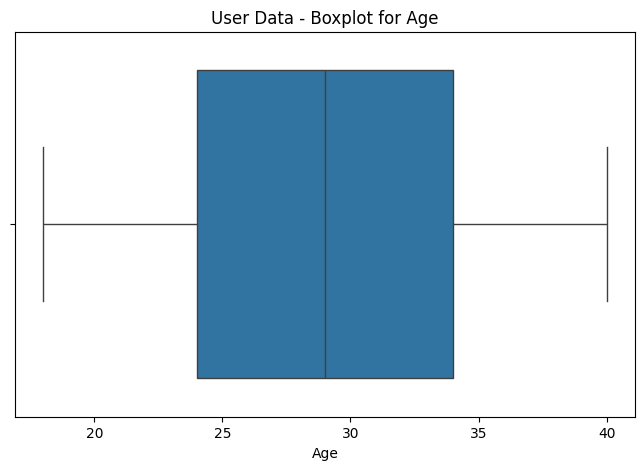

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=user_df['Age'])
plt.title('User Data - Boxplot for Age')
plt.xlabel('Age')
plt.show()

**💡 Explanation:**<br>
> `Age`: No outlier detected.

### 4.3.2. tourism_df

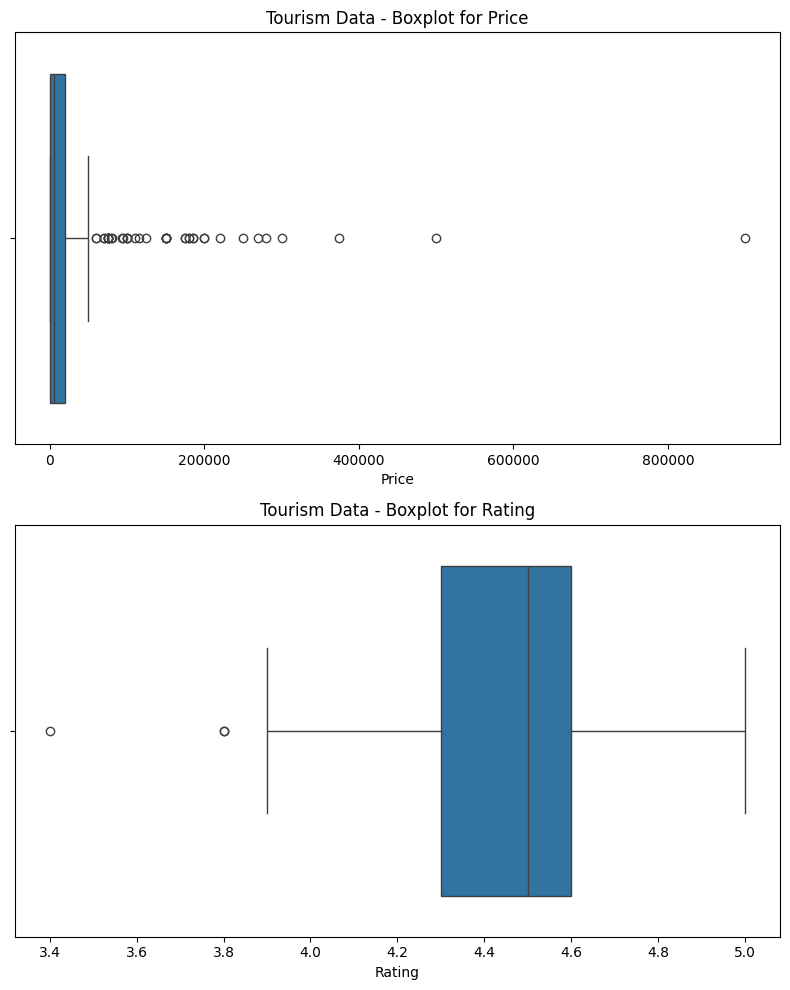

In [15]:
columns_to_plot = ['Price', 'Rating']

plt.figure(figsize=(8, 10))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    sns.boxplot(x=tourism_df[col])
    plt.title(f'Tourism Data - Boxplot for {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

**💡 Explanation:**<br>
> `Price`: The boxplot shows significant outliers on the higher end of values.
> 
> `Rating`: Mostly uniformed, but there are a few outliers below 3.5

**❗ Notes:**<br>
> Since the `package_df` and `rating_df`'s numerical columns only consists of the Id's, there is no need to check for outliers.
>
> As for the `Time_Minutes` column, it won't be used for our purpose of recommendation system, so it will later be dropped.

#### 4.3.2.1. Handle Price Outliers

In [16]:
# Calculate IQR for Price
Q1_price = tourism_df['Price'].quantile(0.25)
Q3_price = tourism_df['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Cap the outliers for Price
tourism_df['Price'] = np.clip(tourism_df['Price'], lower_bound_price, upper_bound_price)

# Normalize Price
scaler_price = MinMaxScaler()
tourism_df['Price'] = scaler_price.fit_transform(tourism_df[['Price']])

print("Price outliers handled and normalized successfully.")

Price outliers handled and normalized successfully.


#### 4.3.2.2. Handle Rating Outliers

In [18]:
# Calculate IQR for Rating
Q1_rating = tourism_df['Rating'].quantile(0.25)
Q3_rating = tourism_df['Rating'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating
lower_bound_rating = Q1_rating - 1.5 * IQR_rating
upper_bound_rating = Q3_rating + 1.5 * IQR_rating

# Cap the outliers for Rating
tourism_df['Rating'] = np.clip(tourism_df['Rating'], lower_bound_rating, upper_bound_rating)

# Normalize Rating
scaler_rating = MinMaxScaler()
tourism_df['Rating'] = scaler_rating.fit_transform(tourism_df[['Rating']])

print("Rating outliers handled and normalized successfully.")

Rating outliers handled and normalized successfully.


**❗ Notes:**<br>
> After handling the outliers, we can re-run the boxplot code cell to ensure that the outliers have been removed.

# 5. Data Preparation

## 5.1. Dataset Merge

In [20]:
df = pd.merge(rating_df.groupby('Place_Id')['Place_Ratings'].mean(), tourism_df, on='Place_Id')
df['Place_Ratings'] = df['Place_Ratings'].round(1)
df.head()

,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,3.7,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,0.4,0.652174,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,2.8,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0.0,0.652174,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,2.5,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,1.0,0.652174,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,2.9,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,0.2,0.565217,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,3.5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,1.0,0.565217,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


## 5.2. Drop unnecessary columns

In [21]:
df = df.drop(['Unnamed: 11','Unnamed: 12','Time_Minutes','Coordinate'],axis=1)
df.head(5)

,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Lat,Long
0,1,3.7,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,0.4,0.652174,-6.175392,106.827153
1,2,2.8,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0.0,0.652174,-6.137645,106.817125
2,3,2.5,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,1.0,0.652174,-6.125312,106.833538
3,4,2.9,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,0.2,0.565217,-6.302446,106.895156
4,5,3.5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,1.0,0.565217,-6.124190,106.839134


**💡 Explanation:**<br>
> The column `Unnamed: 11`, `Unnamed: 12`, and `Time_Minutes` are dropped because it does not give any meaning nor contribution to the data.
>
> While the `Coordinate` column has been represented by the `Lat` and `Long` columns.

## 5.3. Split Train/Test Data

In [22]:
# Step 1: Ensure the column type is float
df['Place_Ratings'] = df['Place_Ratings'].astype(float)

# Step 2: Identify the closest valid rating (in this case, 2.2)
closest_rating = 2.2

# Step 3: Replace the single-instance rating (2.1) with the closest valid rating
df['Place_Ratings'] = df['Place_Ratings'].replace(2.1, closest_rating)

# Step 4: Verify the result
print("Updated Rating Distribution:\n", df['Place_Ratings'].value_counts())

Updated Rating Distribution:
 Place_Ratings
3.1    66
3.0    64
3.2    52
2.9    47
3.3    44
2.8    40
3.4    27
2.7    19
3.5    18
2.6    17
3.6    13
2.5     7
2.2     6
3.8     6
2.3     4
3.7     3
3.9     2
2.4     2
Name: count, dtype: int64


**💡 Explanation:**<br>
> The step above was necessary to ensure that stratification during the data split is successful. There was a single instance of the `Place_Ratings` with the value of `2.1`, which caused the stratified split to fail. 
> 
> Stratification requires that each class has at least two samples to be divided between the training and test sets. By merging this single-instance rating with the closest available rating, we ensured that all classes have sufficient samples for stratified splitting.

In [23]:
# Split the merged dataframe into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Place_Ratings'])

# Check the shapes of the resulting datasets
print(f"Training set shape: {train_data.shape}")
print(f"Test set shape: {test_data.shape}")

Training set shape: (349, 10)
Test set shape: (88, 10)


## 5.4. Convert df to CSV

In [24]:
df.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset exported successfully to 'cleaned_dataset.csv'")

Cleaned dataset exported successfully to 'cleaned_dataset.csv'
